In [1]:
pip install ccxt

     |████████████████████████████████| 1.9 MB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 441 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 156 kB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 48 kB 3.3 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 2.4 MB/s eta 0:00:011
  Created wheel for yarl: filename=yarl-1.1.0-cp38-cp38-macosx_10_9_x86_64.whl size=123187 sha256=d3fce6b1ab1cd3945288713939fb6ccc245a4bdc2a4f8fc09d668edc80523127
  Stored in directory: /Users/daniellicht/Library/Caches/pip/wheels/82/ad/ec/51f1c7833ed931c471836a6f1afc7c2664bd898e0b4ce30d25
Successfully built yarl
Note: you may need to restart the kernel to use updated packages.


In [10]:
import ccxt
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
exch = 'binance' # initial exchange
t_frame = '1d' # 1-day timeframe, usually from 1-minute to 1-week depending on the exchange
symbol = 'ADA/BTC' # initial symbol
exchange_list = ['binance','bitfinex','kraken','poloniex']
 
# Get our Exchange
try:
    exchange = getattr (ccxt, exch) ()
except AttributeError:
    print('-'*36,' ERROR ','-'*35)
    print('Exchange "{}" not found. Please check the exchange is supported.'.format(exch))
    print('-'*80)
    quit()
 
# Check if fetching of OHLC Data is supported
if exchange.has["fetchOHLCV"] != True:
    print('-'*36,' ERROR ','-'*35)
    print('{} does not support fetching OHLC data. Please use another  exchange'.format(exch))
    print('-'*80)
    quit()
 
# Check requested timeframe is available. If not return a helpful error.
if (not hasattr(exchange, 'timeframes')) or (t_frame not in exchange.timeframes):
    print('-'*36,' ERROR ','-'*35)
    print('The requested timeframe ({}) is not available from {}\n'.format(t_frame,exch))
    print('Available timeframes are:')
    for key in exchange.timeframes.keys():
        print('  - ' + key)
    print('-'*80)
    quit()
 
# Check if the symbol is available on the Exchange
exchange.load_markets()
if symbol not in exchange.symbols:
    print('-'*36,' ERROR ','-'*35)
    print('The requested symbol ({}) is not available from {}\n'.format(symbol,exch))
    print('Available symbols are:')
    for key in exchange.symbols:
        print('  - ' + key)
    print('-'*80)
    quit()
 
 


In [18]:
# Get data
data = exchange.fetch_ohlcv(symbol, t_frame)
header = ['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume']
df = pd.DataFrame(data, columns=header).set_index('Timestamp')
df['symbol'] = symbol
syms = [symbol]
filename = '{}.csv'.format(t_frame)

# for exch in exchange_list:
#     try:
#         exchange = getattr (ccxt, exch) ()
#     except AttributeError:
#         print('-'*36,' ERROR ','-'*35)
#         print('Exchange "{}" not found. Please check the exchange is supported.'.format(exch))
#         print('-'*80)
#         quit()
#     if exchange.has["fetchOHLCV"] != True:
#         print('-'*36,' ERROR ','-'*35)
#         print('{} does not support fetching OHLC data. Please use another exchange'.format(exch))
#         print('-'*80)
#         quit()
#     if (not hasattr(exchange, 'timeframes')) or (t_frame not in exchange.timeframes):
#         print('-'*36,' ERROR ','-'*35)
#         print('The requested timeframe ({}) is not available from {}\n'.format(t_frame,exch))
#         print('Available timeframes are:')
#         for key in exchange.timeframes.keys():
#             print('  - ' + key)
#         print('-'*80)
#         quit()
#     exchange.load_markets()
#     for coin in exchange.symbols:
#         if coin in syms or coin[-3:] != 'BTC':
#             continue
#         else:
#             try:
#                 data = exchange.fetch_ohlcv(coin, t_frame)
#             except:
#                 continue
#             data_df = pd.DataFrame(data, columns=header).set_index('Timestamp')
#             data_df['symbol'] = coin
#             df = df.append(data_df)
#             syms.append(coin)
df.index = df.index/1000 #Timestamp is 1000 times bigger than it should be in this case
df['Date'] = pd.to_datetime(df.index,unit='s')

In [19]:
df

,Open,High,Low,Close,Volume,symbol,Date
Timestamp,,,,,,,
1.557878e+09,0.000011,0.000012,0.000011,0.000011,293671123.0,ADA/BTC,2019-05-15
1.557965e+09,0.000012,0.000012,0.000011,0.000011,424861898.0,ADA/BTC,2019-05-16
1.558051e+09,0.000011,0.000012,0.000011,0.000011,296237339.0,ADA/BTC,2019-05-17
1.558138e+09,0.000011,0.000012,0.000011,0.000011,158415495.0,ADA/BTC,2019-05-18
1.558224e+09,0.000011,0.000011,0.000011,0.000011,181871057.0,ADA/BTC,2019-05-19
...,...,...,...,...,...,...,...
1.600646e+09,0.000008,0.000008,0.000007,0.000008,109322493.0,ADA/BTC,2020-09-21
1.600733e+09,0.000008,0.000008,0.000008,0.000008,57899451.0,ADA/BTC,2020-09-22
1.600819e+09,0.000008,0.000008,0.000007,0.000007,60608583.0,ADA/BTC,2020-09-23


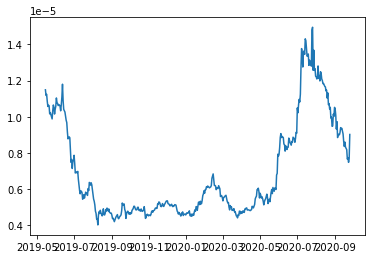

In [20]:
plt.plot(df.Date, df.Close)